In [1]:
import os, contextlib2
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from PIL import Image

import tensorflow as tf

In [2]:
file_paths_train = tf.io.gfile.glob('train_images/*.jpg')
file_ids_train = [x.split('\\')[-1] for x in file_paths_train]

df = pd.read_csv('train.csv')
ids_train = df['ImageId'].unique()
len(ids_train), len(file_ids_train) 

(126, 382)

In [3]:
df.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [4]:
train_image_ids = os.listdir('train_images')

In [6]:
new_df = pd.DataFrame(columns=['image_id', 'class_1', 'class_2', 'class_3', 'class_4'])

for image_id in train_image_ids:
    rows = df[df['ImageId']==image_id]
    
    if len(rows) == 0:
        defect_1 = '1 0'
        defect_2 = '1 0'
        defect_3 = '1 0'
        defect_4 = '1 0'
        
        new_row = [image_id, defect_1, defect_2, defect_3, defect_4]
        new_df_length = len(new_df)
        new_df.loc[new_df_length] = new_row    
        
    else:
        for i in range(len(rows)):
            if rows['ClassId'].iloc[i] == 1:
                defect_1 = rows['EncodedPixels'].iloc[i]
            else:
                defect_1 = '1 0'
                
            if rows['ClassId'].iloc[i] == 2:        
                defect_2 = rows['EncodedPixels'].iloc[i]
            else:           
                defect_2 = '1 0'
        
            if rows['ClassId'].iloc[i] == 3:
                defect_3 = rows['EncodedPixels'].iloc[i]               
            else:
                defect_3 = '1 0'
            
            if rows['ClassId'].iloc[i] == 4:
                defect_4 = rows['EncodedPixels'].iloc[i]
            else:
                defect_4 = '1 0'
           
        new_row = [image_id, defect_1, defect_2, defect_3, defect_4]
        new_df_length = len(new_df)
        new_df.loc[new_df_length] = new_row  

In [7]:
binary_label = []

for i in range(len(new_df)):
    if all((new_df['class_1'][i] == '1 0',
            new_df['class_2'][i] == '1 0',
            new_df['class_3'][i] == '1 0',
            new_df['class_4'][i] == '1 0')):
        binary_label.append(0)
    else:
        binary_label.append(1)
        
new_df['Label'] = binary_label

In [8]:
new_df.head()

,image_id,class_1,class_2,class_3,class_4,Label
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,1 0,1 0,1 0,1
1,0007a71bf.jpg,1 0,1 0,18661 28 18863 82 19091 110 19347 110 19603 11...,1 0,1
2,000a4bcdd.jpg,37607 3 37858 8 38108 14 38359 20 38610 25 388...,1 0,1 0,1 0,1
3,000f6bf48.jpg,1 0,1 0,1 0,131973 1 132228 4 132483 6 132738 8 132993 11 ...,1
4,0014fce06.jpg,1 0,1 0,229501 11 229741 33 229981 55 230221 77 230468...,1 0,1


In [9]:
file_ids = file_ids_train + file_ids_test
file_paths = file_paths_train + file_paths_test
paths_dict = dict(zip(file_ids, file_paths))

In [10]:
df0 = new_df[new_df.Label == 0]
df1 = new_df[new_df.Label == 1]

ids_0 = df0['image_id'].unique()
ids_1 = df1['image_id'].unique()

print('Number of images with no defect to be recorded: {}'.format(len(ids_0)))
print('Number of images with defect to be recorded:    {}'.format(len(ids_1)))

Number of images with no defect to be recorded: 256
Number of images with defect to be recorded:    126


In [11]:
file_ids = file_ids_train #+ file_ids_test
file_paths = file_paths_train #+ file_paths_test
paths_dict = dict(zip(file_ids, file_paths))
assert len(paths_dict.keys()) == len(file_ids_train) + len(file_ids_test)

In [12]:
image = np.array(Image.open(paths_dict[ids_1[0]]))


height, width, channels  = image.shape
print(height, width, channels)

IMAGE_SIZE = (height, width)
N_CHANNELS = channels
N_CLASSES = 4

256 1600 3


In [13]:
def rle_class_1(image_id):
    temp_df = new_df['class_1'][new_df['image_id'] == image_id]
    for rle in temp_df:
        rle_tensor = tf.constant(rle)
        return rle_tensor.numpy()

In [14]:
def rle_class_2(image_id):
    temp_df = new_df['class_2'][new_df['image_id'] == image_id]
    for rle in temp_df:
        rle_tensor = tf.constant(rle)
        return rle_tensor.numpy()

In [15]:
def rle_class_3(image_id):
    temp_df = new_df['class_3'][new_df['image_id'] == image_id]
    for rle in temp_df:
        rle_tensor = tf.constant(rle)
        return rle_tensor.numpy()

In [16]:
def rle_class_4(image_id):
    temp_df = new_df['class_4'][new_df['image_id'] == image_id]
    for rle in temp_df:
        rle_tensor = tf.constant(rle)
        return rle_tensor.numpy()

In [17]:
def _bytestring_feature(list_of_bytestrings):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=list_of_bytestrings))

def _int_feature(list_of_ints): # int64
    return tf.train.Feature(int64_list=tf.train.Int64List(value=list_of_ints))

def image_bits_from_id(image_id):
    image = Image.open(paths_dict[image_id])
    image = tf.constant(image)
    image_bits = tf.image.encode_jpeg(image, optimize_size=True, chroma_downsampling=False)
    image_bits = image_bits.numpy()
    return image_bits

def create_tfrec_example(image_id, defect = 0):
    '''
    Creates a TFRecord example
    args: image_id: (str) the image id
          defect: (int or None) one of 0, 1, or None. 1 for disease, 
              0 for no disease. None if unknown (i.e. test record)
    returns: tfrec example
    '''    
    image = image_bits_from_id(image_id) 
    rle_1 = rle_class_1(image_id)
    rle_2 = rle_class_2(image_id)
    rle_3 = rle_class_3(image_id)
    rle_4 = rle_class_4(image_id)
    
    
    feature = {
        'image': _bytestring_feature([image]),
        'img_id': _bytestring_feature([image_id.encode()]),
        'width': _int_feature([1600]), 
        'height': _int_feature([256]),
        'label': _int_feature([defect]),
        'rle': _bytestring_feature([rle_1, rle_2, rle_3, rle_4])
        }

    tfrec_example = tf.train.Example(features=tf.train.Features(feature=feature))
    return tfrec_example


In [18]:
create_tfrec_example(ids_1[10], 1)

features {
  feature {
    key: "height"
    value {
      int64_list {
        value: 256
      }
    }
  }
  feature {
    key: "image"
    value {
      bytes_list {
        value: "\377\330\377\340\000\020JFIF\000\001\001\001\001,\001,\000\000\377\333\000C\000\002\001\001\001\001\001\002\001\001\001\002\002\002\002\002\004\003\002\002\002\002\005\004\004\003\004\006\005\006\006\006\005\006\006\006\007\t\010\006\007\t\007\006\006\010\013\010\t\n\n\n\n\n\006\010\013\014\013\n\014\t\n\n\n\377\333\000C\001\002\002\002\002\002\002\005\003\003\005\n\007\006\007\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\377\300\000\021\010\001\000\006@\003\001\021\000\002\021\001\003\021\001\377\304\000\036\000\000\001\004\003\001\001\001\000\000\000\000\000\000\000\000\000\004\002\003\005\006\000\001\007\010\t\n\377\304\000T\020\000\001\003\002\004\003\005\004\006\006\010\003\007\003\001\t\002\003\004\022\005\"\000\006\0232\001\007B\010\024#Rb\021

In [19]:
 # the number of TFREcs for each label class.
def get_tfrec_fnames(id_list, description, NUM_TFRECS):
    shard_object_count = [int(len(id_list) / NUM_TFRECS)] * NUM_TFRECS

    for i in range(len(id_list) % NUM_TFRECS):  
        shard_object_count[i] = shard_object_count[i] + 1
    
    tf_record_output_filenames = ['severstal-256x1600-{}-{:02d}-{}.tfrec'.format(
        description, idx+1, shard_object_count[idx]) for idx in range(NUM_TFRECS)]
    return tf_record_output_filenames

In [20]:
defect_tfrec_names = get_tfrec_fnames(ids_1, 'train-defect', NUM_TFRECS = 20)

no_defect_tfrec_names = get_tfrec_fnames(ids_0, 'train-no-defect', NUM_TFRECS = 20)

test_tfrec_names = get_tfrec_fnames(file_ids_test, 'test', NUM_TFRECS = 20)

defect_dict = {'ids': ids_1, 'tfrec_names': defect_tfrec_names, 'defect': 1, 'NUM_TFRECS':20}
no_defect_dict = {'ids': ids_0, 'tfrec_names': no_defect_tfrec_names, 'defect': 0, 'NUM_TFRECS':20}
test_dict = {'ids': file_ids_test, 'tfrec_names': test_tfrec_names, 'defect': None, 'NUM_TFRECS':20}

In [21]:
def open_sharded_tfrecs(exit_stack, tfrec_names):
    return [exit_stack.enter_context(tf.io.TFRecordWriter(fname)) for fname in tfrec_names]

for d in [defect_dict, no_defect_dict]:
    id_list = d['ids']
    tfrec_names = d['tfrec_names']
    defect = d['defect']
    NUM_TFRECS = d['NUM_TFRECS']

    with contextlib2.ExitStack() as tf_record_close_stack:
        output_tfrecords = open_sharded_tfrecs(tf_record_close_stack, tfrec_names)    

        for i, image_id in enumerate(id_list): 
            tf_record = create_tfrec_example(image_id, defect)
            output_tfrecords[i%NUM_TFRECS].write(tf_record.SerializeToString())

#### VIEW RECORDS

In [22]:
TFRECS_DEFECT = tf.io.gfile.glob('*train-defect*.tfrec')
TFRECS_NODEFECT = tf.io.gfile.glob('*train-no-defect*.tfrec')

In [23]:
def parse_tfrecord_fn(example):
    features = {
        'image': tf.io.FixedLenFeature([], tf.string), 
        'img_id': tf.io.FixedLenFeature([], tf.string), 
        'height': tf.io.FixedLenFeature([], tf.int64),
        'width': tf.io.FixedLenFeature([], tf.int64),
        }
    features['rle'] = tf.io.FixedLenFeature([4], tf.string)
    features['label'] = tf.io.FixedLenFeature([], tf.int64)

    example = tf.io.parse_single_example(example, features)
    example["image"] = tf.io.decode_jpeg(example["image"], channels=3)
    return example

height: 256
img_id: b'0002cc93b.jpg'
label: 1
rle: [b'29102 12 29346 24 29602 24 29858 24 30114 24 30370 24 30626 24 30882 24 31139 23 31395 23 31651 23 31907 23 32163 23 32419 23 32675 23 77918 27 78174 55 78429 60 78685 64 78941 68 79197 72 79452 77 79708 81 79964 85 80220 89 80475 94 80731 98 80987 102 81242 105 81498 105 81754 104 82010 104 82265 105 82521 31 82556 69 82779 27 82818 63 83038 22 83080 57 83297 17 83342 50 83555 13 83604 44 83814 8 83866 37 84073 3 84128 31 84390 25 84652 18 84918 8 85239 10 85476 29 85714 47 85960 57 86216 57 86471 58 86727 58 86983 58 87238 59 87494 59 87750 59 88005 60 88261 60 88517 60 88772 61 89028 53 89283 40 89539 32 89667 10 89795 30 89923 28 90050 29 90179 37 90306 27 90434 38 90562 14 90690 38 90817 9 90946 38 91073 3 91202 38 91458 38 91714 38 91969 39 92225 39 92481 39 92737 39 92993 39 93248 40 93504 40 93760 40 94026 30 94302 10 189792 7 190034 21 190283 28 190539 28 190795 28 191051 28 191307 28 191563 28 191819 28 192075 28 192331 28

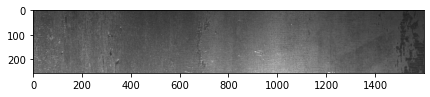

height: 256
img_id: b'002af848d.jpg'
label: 1
rle: [b'1 0' b'1 0' b'1 0'
 b'290800 6 291055 13 291311 15 291566 18 291822 18 292077 19 292333 19 292588 20 292844 20 293099 21 293354 22 293610 22 293865 23 294121 23 294376 24 294632 24 294887 25 295143 25 295398 26 295654 26 295909 27 296165 27 296421 27 296677 27 296932 27 297188 27 297444 27 297699 28 297955 28 298211 28 298466 29 298722 29 298979 28 299235 28 299492 27 299748 27 300005 26 300261 26 300518 25 300775 24 301031 24 301288 23 301544 23 301801 22 302057 22 302314 21 302571 20 302829 18 303086 17 303343 16 303599 16 303856 15 304113 14 304369 14 304626 13 304882 13 305139 12 305396 11 305652 11 305909 10 306165 10 306421 10 306677 10 306933 10 307188 11 307444 10 307699 11 307953 13 308207 15 308461 17 308715 19 308969 21 309223 23 309478 24 309732 26 309987 27 310243 27 310498 28 310754 28 311009 29 311265 29 311520 30 311776 30 312031 31 312290 28 312550 24 312811 18 313071 14 313332 8 313592 3 354019 2 354029 8 354274 22

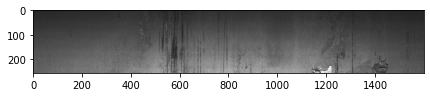

height: 256
img_id: b'005f19695.jpg'
label: 1
rle: [b'1 0' b'1 0'
 b'123137 7 123393 19 123649 32 123905 44 124161 57 124417 69 124673 82 124929 94 125185 107 125441 119 125697 126 125953 125 126209 124 126465 123 126721 122 126977 121 127233 120 127489 119 127745 118 128021 97 128315 58 128609 19 133889 7 134145 21 134401 35 134657 49 134913 62 135169 76 135425 90 135681 104 135937 118 136193 131 136449 145 136705 159 136961 173 137217 186 137473 200 137740 203 138017 196 138295 181 138572 160 138849 139 139127 117 139404 96 139681 75 139958 54 140236 32 140513 11 146945 6 147201 16 147457 27 147713 38 147969 48 148225 59 148481 70 148737 80 148993 91 149249 101 149505 112 149761 123 150017 133 150273 144 150529 155 150785 165 151041 176 151297 186 151553 197 151809 208 152072 211 152342 208 152611 206 152880 203 153150 195 153419 182 153689 168 153958 155 154228 141 154497 128 154766 115 155036 101 155305 88 155575 74 155844 61 156114 47 156383 34 156652 21 156922 7 173571 10 173827 

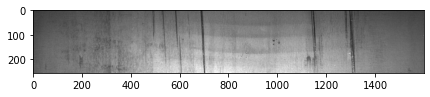

height: 256
img_id: b'00ac8372f.jpg'
label: 1
rle: [b'1 0'
 b'98114 24 98370 72 98626 119 98881 168 99137 192 99393 192 99649 192 99905 192 100161 192 100416 192 100672 192 100928 192 101232 144 101584 48 106983 26 107188 77 107393 128 107598 179 107803 229 108033 255 108289 254 108545 254 108801 253 109057 253 109313 252 109569 252 109825 251 110081 251 110337 250 110593 250 110849 249 111105 249 111361 248 111617 248 111873 243 112129 233 112385 223 112641 203 112897 173 113153 150 113409 132 113665 115 113921 97 114177 79 114433 62 114689 44 114945 27 115201 9'
 b'1 0' b'1 0']
width: 1600
Image shape: (256, 1600, 3)


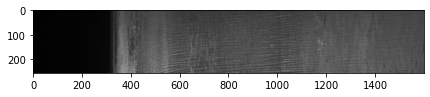

height: 256
img_id: b'00d639396.jpg'
label: 1
rle: [b'1 0' b'1 0'
 b'229356 17 229595 34 229850 36 230105 37 230360 38 230615 40 230870 41 231125 43 231380 44 231636 44 231891 45 232146 46 232401 47 232656 48 232911 49 233166 50 233421 51 233676 52 233931 53 234186 54 234441 55 234696 56 234951 58 235206 59 235462 59 235717 60 235972 61 236227 62 236482 63 236737 64 236992 65 237247 66 237502 67 237757 68 238012 69 238267 70 238522 71 238777 72 239032 73 239288 73 239543 74 239798 75 240053 76 240308 77 240563 78 240818 79 241073 80 241328 81 241583 82 241838 83 242093 84 242348 85 242603 86 242858 87 243114 87 243369 88 243624 89 243879 90 244134 91 244389 92 244644 93 244899 94 245154 95 245409 96 245664 97 245919 98 246174 99 246429 100 246684 101 246940 101 247195 102 247450 103 247705 104 247960 105 248215 106 248470 107 248725 108 248980 109 249235 110 249490 111 249745 112 250000 113 250255 114 250510 115 250766 115 251021 116 251276 117 251531 118 251786 119 252041 120 252296 1

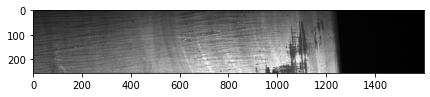

In [24]:
raw_dataset = tf.data.TFRecordDataset(TFRECS_DEFECT[0])
parsed_dataset = raw_dataset.map(parse_tfrecord_fn)

for features in parsed_dataset.take(5):
    for key in features.keys():
        if key != "image":
            print(f"{key}: {features[key]}")

    print(f"Image shape: {features['image'].shape}")
    plt.figure(figsize=(7, 7))
    plt.imshow(features["image"].numpy())
    plt.show()